# Midterm 1

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# Instructions

## Please note the following:

Points
* The exam is `100` points.
* You have `125` minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.


Submission
* You will upload your solution to the `Midterm 1` assignment on Canvas, where you downloaded this. (Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers,)
* and it should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo--you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:
* `midterm_1_data.xlsx`

This file has sheets for...
* `stocks excess returns` - excess returns of the 14 biggest companies in the S&P.
* `proshares excess returns` - excess returns of ETFs and indexes from the Proshares case study.
* `fx carry excess returns` - excess returns from FX products.

Note the data is **monthly** for the first two sheets (stocks and proshares). Any annualizations for those two sheets should use `12` months in a year. Annualization for the third sheet (fx carry excess returns) is explained in section 4.

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 15     |
| 2       | 25     |
| 3       | 35     |
| 4       | 25     |

### Each numbered question is worth 5 points unless otherwise specified.

***

# 1. Short Answer

#### No Data Needed

These problems do not require any data file. Rather, analyze them conceptually. 

### 1.

#### (10pts)

In the mean-variance optimization of `homework 1`, suppose we found the mean excess return of TIPS is 4% annualized.

Explain--conceptually--how each of the following would have impacted the new (with TIPS) MV solution.
* TIPS is found to have correlation of 0% to `IEF` and 0% to SPY.
* TIPS is found to have correlation of 100% to `IEF`.

Would it be possible for TIPS to have been found to have 0% correlation to every other asset in `homework 1`? Explain.

Answer: 

Originally, the annualized mean excess return for TIPS is 1.68%, and now it increases to 4% annualized.
1. As TIPS performs really well regarding its mean excess return compared to other assets, the weight for TIPS should be very large according to the optimizeation. Compared to the original MV portfolio, with consists of 51.04% TIPS inside, now the percentage should be greater. Also, the new MV will have effcient frontier that is much higher than original, with the optimial tangent portfolio being dominated by TIPS, which has greater sharpe ratio in the end.
2. The MV calculation doesn't allow linearly dependent return vector, which at the end will cause the variance matrix to be not invertible. It is because, if the 100% correlation exists, the perfect arbitrage can be formulated by buying TIPS and shorting IEF. 

Theoretically, it is possible to include an asset that has 0% correlation with every other asset. However, as TIPS represent the a bond issued by Fed to eliminate the impact of inflation, it closely related to the US economy. And for other assets in homework 1, very most of them are strongly influenced by US economy, for example SPY. From this logic, it is impossible that TIPS have 0% corerlation with every other asset.



### 2. 

Depending on the application, one may or may not choose to include an intercept term in a linear factor decomposition of an asset’s returns. In what circumstances would I prefer to include an intercept, and in what circumstances would I not?

***

From the Factor decomposition model, the alpha represents a good security selection within the chosen asset classes, while the beta represents the asset allocation that we put on a general asset class. 

1. If we include the intercept, it means that we can formulate a more accurate projection for the beta, as the mean of the return might not be zero. In this case, it is better to do an evaluation for our previous return metrics in regard some factors that we would like to capture and explain on.
2. If we do not include the intercept, although the tracking can be not that accurate, we can formulate a hedging position as beta is can be traded but alpha can not. Alpha means the average we can beat the market, hence it is not a kind of asset that we can trade on.

# 2. Portfolio Allocation

For this question you will only use data from the sheet `stocks excess returns`.

It contains excess returns for the 14 largest stocks in the S&P.

### 1.

Calculate the tangency portfolio from the start of the sample to December of 2018 (to 2018-12-31), which we call in-sample period. Use the following methods:
- Traditional tangency portfolio.
- Regularized tangency portfolio (divide by 2 every element outside of the diagonal in the covariance matrix prior to the calculation).

Return:
- The weights of each asset for the traditional tangency portfolio and the regularized tangency portfolio.
- The sum of absolute values of the weights for the traditional tangency portfolio and the regularized tangency portfolio:

$$
\sum_{i=1}^{n} |w_i|
$$


In [1]:
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
df_stock = pd.read_excel('../data/midterm_1_data.xlsx', sheet_name = 'stocks excess returns')
df_stock['date'] = pd.to_datetime(df_stock['date'])
df_stock = df_stock.set_index('date')
display(df_stock.head(5))

start_time = df_stock.index[0]
end_time = pd.to_datetime('2018-12-31')

,AAPL,AMZN,BRK-B,GOOGL,JNJ,JPM,LLY,META,MSFT,NVDA,TSLA,UNH,V,XOM
date,,,,,,,,,,,,,,
2012-06-30,0.010943,0.072609,0.050116,-0.001270,0.082263,0.077918,0.047953,0.050766,0.048052,0.111916,0.060768,0.052919,0.073267,0.088352
2012-07-31,0.045822,0.021677,0.018121,0.091196,0.024570,0.015958,0.026101,-0.301929,-0.036613,-0.020260,-0.123682,-0.126667,0.044002,0.014958
2012-08-31,0.093695,0.063985,-0.006075,0.082161,-0.017188,0.031486,0.031399,-0.168306,0.052556,0.036008,0.039935,0.062649,-0.004849,0.011533
2012-09-30,0.002878,0.024450,0.045849,0.101397,0.022030,0.090012,0.055749,0.199417,-0.034312,-0.049099,0.026730,0.024657,0.047099,0.047619
2012-10-31,-0.107527,-0.084192,-0.020903,-0.098271,0.027789,0.037321,0.025805,-0.025320,-0.040922,-0.101877,-0.039204,0.010720,0.033436,-0.002989


In [3]:
def tangency_weight(returns):
    miu = np.mean(returns, axis = 0)

    inv_cov = np.linalg.inv(returns.cov() * 12)

    ones_col = np.ones(shape=(len(inv_cov), 1))
    first_term = 1/(ones_col.T @ inv_cov @ miu)[0]
    result_weight = first_term * inv_cov @ miu

    result_weight = pd.DataFrame(result_weight, index = returns.columns, columns=['Tangency Weights'])

    return result_weight

portfolio_tangency_noregularize = tangency_weight(df_stock[start_time: end_time])

display(portfolio_tangency_noregularize)

print(f"The sum of the absolute values of the weights for the traditional tangency portfolio: {sum(np.abs(portfolio_tangency_noregularize['Tangency Weights'].values))}")

,Tangency Weights
AAPL,-0.127836
AMZN,-0.040576
BRK-B,0.131333
GOOGL,0.025968
JNJ,0.130408
JPM,-0.013929
LLY,0.352670
META,0.030541
MSFT,0.137917
NVDA,0.163501


The sum of the absolute values of the weights for the traditional tangency portfolio: 2.197687078529789


In [4]:
def tangency_weight_regularized(returns):
    miu = np.mean(returns, axis = 0)

    cov_matrix = returns.cov() * 12
    cov_matrix_reg = cov_matrix.copy()

    for i in range(cov_matrix_reg.shape[0]):
        for j in range(cov_matrix_reg.shape[1]):
            if i != j:
                cov_matrix_reg.iloc[i, j] /= 2

    inv_cov = np.linalg.inv(cov_matrix_reg)

    ones_col = np.ones(shape=(len(inv_cov), 1))
    first_term = 1 / (ones_col.T @ inv_cov @ miu)[0]
    result_weight = first_term * (inv_cov @ miu)

    result_weight = pd.DataFrame(result_weight, index=returns.columns, columns=['Tangency Weights'])

    return result_weight

portfolio_tangency_regularized = tangency_weight_regularized(df_stock[start_time: end_time])

display(portfolio_tangency_regularized)

print(f"The sum of the absolute values of the weights for the regularized tangency portfolio: {sum(np.abs(portfolio_tangency_regularized['Tangency Weights'].values))}")

,Tangency Weights
AAPL,-0.014706
AMZN,0.036310
BRK-B,0.109162
GOOGL,0.050545
JNJ,0.099190
JPM,0.053691
LLY,0.214949
META,0.034896
MSFT,0.089970
NVDA,0.071696


The sum of the absolute values of the weights for the regularized tangency portfolio: 1.3426467125901391


### 2.

Calculate the annualized summary statistics (mean, Sharpe, vol) of both portfolios in-sample.


In [5]:
def portfolio_statistics(df):
    statistics = pd.DataFrame()
    statistics['Mean'] = [np.mean(df) * 12]
    statistics['Volatility'] = [np.std(df, ddof = 1) * np.sqrt(12)]
    statistics['Sharpe'] = statistics['Mean'] / statistics['Volatility']

    return statistics

statistics_one = portfolio_statistics(df_stock[start_time:end_time] @ portfolio_tangency_noregularize['Tangency Weights'].T)
statistics_two = portfolio_statistics(df_stock[start_time:end_time] @ portfolio_tangency_regularized['Tangency Weights'].T)

In [6]:
statistics = pd.concat([statistics_one, statistics_two])
statistics.index = ['Traditional tangency portfolio', 'Regularized tangency portfolio']
statistics

,Mean,Volatility,Sharpe
Traditional tangency portfolio,0.348256,0.134053,2.597896
Regularized tangency portfolio,0.276599,0.114184,2.422392


### 3.

Use the weights calculated in question (2.2) to produce portfolio returns out-of-sample for both the Traditional and Regularized portfolio (from January 2019 onwards). 

Report the **last 3 returns** of both portfolios in the out-of-sample (the traditional tangency portfolio and the regularized tangency portfolio).

In [7]:
out_of_sample_start = pd.to_datetime('2019-01-01')
traditional_oos_returns = df_stock[out_of_sample_start:] @ portfolio_tangency_noregularize['Tangency Weights'].T
regularized_oos_returns = df_stock[out_of_sample_start:] @ portfolio_tangency_regularized['Tangency Weights'].T

In [8]:
print('Last 3 returns for oos traditional tangency portfolio:')
print((traditional_oos_returns)[-3:])

print('Last 3 returns for oos regularized tangency portfolio:')
print((regularized_oos_returns)[-3:])

Last 3 returns for oos traditional tangency portfolio:
date
2024-07-31   -0.016012
2024-08-31    0.101241
2024-09-30   -0.025162
dtype: float64
Last 3 returns for oos regularized tangency portfolio:
date
2024-07-31    0.003227
2024-08-31    0.064626
2024-09-30   -0.016477
dtype: float64


### 4.

Report the annualized summary statistics (Mean, Vol and Sharpe) of both portfolios in the out-of-sample.

Note: you are using the weights optimized for the in-sample and generating statistics with the out-of-sample returns.

In [9]:
statistics_one_oos = portfolio_statistics(traditional_oos_returns)
statistics_two_oos = portfolio_statistics(regularized_oos_returns)

statistics_oos = pd.concat([statistics_one_oos, statistics_two_oos])
statistics_oos.index = ['Traditional tangency portfolio oos', 'Regularized tangency portfolio oos']
statistics_oos

,Mean,Volatility,Sharpe
Traditional tangency portfolio oos,0.321558,0.222352,1.446167
Regularized tangency portfolio oos,0.268686,0.176334,1.523729


### 5.
Which portfolio has better adjusted by risk returns in the out-of-sample? Could there be a mathematical/optimization reason why one portfolio had better adjusted by risk performance? 

Relate your answer to your findings in question (2.2) (Sum of absolute weights in the traditional and regularized tangency portfolio.)

From our findings, we can see the out of sample sharpe ratio for regularized portfolio is higher than the sharpe ratio for tradtional portfolio. Although the annualized excess return of traditional portfolio oos is higher, its volatility is also much higher than the regularized portfolio.

1. In practice, the covariance matrix is estimated from historical data, which may not be accurate. By reducing the meganitude of many estimates of in the covariance metrics, we can have a less error involved covariance matrix.
2. In terms of the absolute weight, the tradtional model fits too well to the in sample data that create a nearly 2 times absolute weight portfolio than the regularized one. Regularization simplifies the model by placing less weight on complex relationships between assets to avoide overfitting.
3. The relationships between assets in the in-sample covariance matrix may change in the future, and the original covariance metrics has higher conditional number than the regularized one, causing the inverted metrix to be unstable.

***

# 3. Hedging and Replication

For this question you will only use data from the sheet `proshares returns`.

The following assets excess returns are available in this sheet:

- **HDG US Equity**: ProShares Hedge Replication ET
- **QAI US Equity**: NYLI Hedge Multi-Strategy Trac
- **SPY US Equity**: SPDR S&P 500 ETF Trust
- **EEM US Equity**: iShares MSCI Emerging Markets
- **EFA US Equity**: iShares MSCI EAFE ETF
- **EUO US Equity**: ProShares UltraShort Euro
- **IWM US Equity**: iShares Russell 2000 ETF
- **SPXU US Equity**: ProShares UltraPro Short S&P 5
- **UPRO US Equity**: ProShares UltraPro S&P 500

### 1. 

You work at a hedge fund.

Suppose the hedge fund is long $1 million of HDG and wants to hedge the position.

A junior analyst suggests that we can hedge our position by looking at some select ETFs, and then taking a position in the ETFs that will offset the risk of our HDG position.

They pick QAI, SPY, EEM, UPRO, SPXU, IWM, and EFA.

What dollar position would we be taking in each ETF to hedge your HDG position?

In [10]:
df_proshare = pd.read_excel('../data/midterm_1_data.xlsx', sheet_name = 'proshares excess returns')
df_proshare['date'] = pd.to_datetime(df_proshare['date'])
df_proshare = df_proshare.set_index('date')
display(df_proshare.head(5))

,HDG US Equity,QAI US Equity,SPY US Equity,EEM US Equity,EFA US Equity,EUO US Equity,IWM US Equity,SPXU US Equity,UPRO US Equity
date,,,,,,,,,
2011-08-31,-0.027036,-0.006489,-0.054976,-0.092549,-0.087549,-0.005889,-0.088913,0.056476,-0.210854
2011-09-30,-0.032466,-0.022141,-0.069420,-0.179063,-0.108082,0.142180,-0.111505,0.190006,-0.207003
2011-10-31,0.050531,0.025239,0.109147,0.162986,0.096274,-0.069502,0.151011,-0.298828,0.326066
2011-11-30,-0.028608,-0.007964,-0.004064,-0.019724,-0.021765,0.054627,-0.003784,-0.035515,-0.033502
2011-12-31,0.012875,0.001822,0.010449,-0.042649,-0.021744,0.075581,0.005144,-0.051986,0.022939


In [11]:
y_values = df_proshare['HDG US Equity']
X_values = df_proshare.drop('HDG US Equity', axis = 1).values

def calculate_hedge_positions(y, X, hdg_position=1_000_000):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    # print(model.summary())
    hedge_ratios = model.params[1:]
    hedge_positions = hedge_ratios * hdg_position

    hedge_df = pd.DataFrame({
        'Hedge Ratio': hedge_ratios,
        'Dollar Position': hedge_positions
    })

    return hedge_df, model.rsquared

hedge_portfolio, R_squared = calculate_hedge_positions(y_values, X_values, hdg_position=1_000_000)
hedge_portfolio.index = df_proshare.columns[1:]
hedge_portfolio

,Hedge Ratio,Dollar Position
QAI US Equity,0.165111,165111.135032
SPY US Equity,0.507994,507994.316411
EEM US Equity,0.055945,55944.829049
EFA US Equity,0.139791,139790.624129
EUO US Equity,0.035177,35177.453637
IWM US Equity,0.133209,133208.690563
SPXU US Equity,0.026506,26505.989765
UPRO US Equity,-0.147555,-147554.587367


### 2.

#### (7pts)
What is the gross notional of the hedge?

What is the R-squared of the hedge?

What do these two statistics indicate about the practical use of this hedge?

In [12]:
print(f'Gross notional of the hedge {sum(hedge_portfolio['Dollar Position'])}')
print(f'R squared: {R_squared}')

Gross notional of the hedge 916178.4512184942
R squared: 0.917365084008627


The gross notional tells us the total amount of capital required, while the R-squared provides insight into the effectiveness of the hedge.

In terms of the result in sample, the gross amount is around 92% of our own position, which is good in terms of dollar neutral idea. The R squared is 0.9174, which is also quite good, indicating that the regression fits pretty well, and our hedging making sense.

### 3.

Suppose instead we don't want to hedge our position. We believe that the value of HDG can be *entirely* determined by some combination of the other ETFs. 

So, you propose the following model:

$$
HDG_t = \beta_1 QAI_t + \beta_2 SPY_t + \beta_3 EEM_t + \varepsilon_t
$$

We think any difference between the value of HDG and the value of the ETFs is a mispricing, and will revert to 0 in the future. We call such a strategy "trading the residuals".

Therefore, if $\varepsilon_t > 0$, we should be short HDG and long the basket, and if $\varepsilon_t < 0$, we should be long HDG and short the basket.

Now...
* Run the model specified above and report the $\beta$'s values.
* After, create the "basket" portfolio, using the $\beta$'s as weights (they do not need to add up to one). Report the final three values.

In [13]:
X_values_new = df_proshare[['QAI US Equity', 'SPY US Equity', 'EEM US Equity']].values

def calculate_hedge_replicate(y, X, hdg_position=1_000_000):
    # X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    hedge_ratios = model.params
    hedge_positions = hedge_ratios * hdg_position

    hedge_df = pd.DataFrame({
        'Hedge Ratio': hedge_ratios,
        'Dollar Position': hedge_positions
    })

    return hedge_df, model.rsquared

hedge_portfolio_new, R_squared_new = calculate_hedge_replicate(y_values, X_values_new, hdg_position=1_000_000)
hedge_portfolio_new.index = ['QAI US Equity', 'SPY US Equity', 'EEM US Equity']
hedge_portfolio_new

,Hedge Ratio,Dollar Position
QAI US Equity,0.356368,356368.351656
SPY US Equity,0.162696,162696.443989
EEM US Equity,0.086523,86523.106122


In [14]:
basket_portfolio_return = df_proshare[['HDG US Equity']].copy()
basket_portfolio_return['Hedge'] = df_proshare[['QAI US Equity', 'SPY US Equity', 'EEM US Equity']] @ hedge_portfolio_new['Hedge Ratio'].T
basket_portfolio_return['Basket'] = basket_portfolio_return['HDG US Equity'] - basket_portfolio_return['Hedge']

basket_portfolio_return['Basket'][-3:]

date
2024-07-31    0.017660
2024-08-31   -0.009786
2024-09-30   -0.006122
Name: Basket, dtype: float64

### 4.

#### (8pts)

Construct the strategy indicated by the approach in the previous problem.

For a given period $t$:
- if the $\varepsilon_t \leq 0$ (is negative or equal to 0), you should be long HDG 200% in HDG and short 100% in the basket portfolio **in period $t+1$**.
- if the $\varepsilon_t > 0$ (is positive), you should be long 200% in the basket portfolio and short 100% **in HDG in period $t+1$**.

Do not worry about the look forward bias: in this scenario, you should run the model only once with the entire dataset and define your $\varepsilon_t$ for any $t$ also considering the model that has acess to data in $t+1, t+2, ...$ to make the calculation.  

Report the annualized summary statistics of this strategy (Mean, Vol and Sharpe).

In [18]:
def construct_strategy(basket_portfolio_return, annual_factor=12):
    strategy_return = np.zeros(len(basket_portfolio_return))

    for t in range(len(basket_portfolio_return) - 1):
        if basket_portfolio_return['Basket'].iloc[t] <= 0:
            strategy_return[t + 1] = (
                2 * basket_portfolio_return['HDG US Equity'].iloc[t + 1]
                - 1 * basket_portfolio_return['Hedge'].iloc[t + 1]
            )
        else:
            strategy_return[t + 1] = (
                2 * basket_portfolio_return['Hedge'].iloc[t + 1]
                - 1 * basket_portfolio_return['HDG US Equity'].iloc[t + 1]
            )

    basket_portfolio_return['Strategy Return'] = strategy_return

    mean_return = basket_portfolio_return['Strategy Return'].mean() * annual_factor
    vol_return = basket_portfolio_return['Strategy Return'].std(ddof = 1) * np.sqrt(annual_factor)
    sharpe_ratio = (mean_return) / vol_return

    summary_stats = pd.DataFrame({
        'Mean Return': [mean_return],
        'Volatility': [vol_return],
        'Sharpe Ratio': [sharpe_ratio]
    })

    return summary_stats

summary_stats_trading = construct_strategy(basket_portfolio_return)
summary_stats_trading.index = ['Traing Performance']
display(summary_stats_trading)

,Mean Return,Volatility,Sharpe Ratio
Traing Performance,0.036563,0.062051,0.58924


### 5.

On a different matter, we are now studying QAI and want to track (replicate) it using the other available ETFs.

Use an intercept and report:

- $\beta$ (and the sum of $\beta$'s absolute value).
- $\alpha$ and Information Ratio.
- $R^2$.
- Correlation matrix between the assets used to replicate QAI.

In [27]:
y_QAI = df_proshare['QAI US Equity']
X_QAI = df_proshare.drop('QAI US Equity', axis = 1).values

def calculate_hedge_positions(y, X):

    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    alpha = model.params[0]
    betas = model.params[1:]
    hedge_df = pd.DataFrame({
        'Hedge Ratio (β)': betas,
    })

    # Calculate sum of the absolute values of betas
    sum_abs_betas = betas.abs().sum()

    # Calculate information ratio (alpha / std(residuals))
    residuals = model.resid
    std_residuals = residuals.std()
    information_ratio = alpha / std_residuals

    r_squared = model.rsquared

    correlation_matrix = pd.DataFrame(X).iloc[:, 1:].corr()

    # Return all results as a dictionary
    return {
        'Hedge DataFrame': hedge_df,
        'Sum of |β|': sum_abs_betas,
        'Alpha (α)': alpha,
        'Information Ratio': information_ratio,
        'R-squared': r_squared,
        'Correlation Matrix': correlation_matrix
    }

results = calculate_hedge_positions(y_QAI, X_QAI)
results['Hedge DataFrame'].index = ['HDG US Equity'] + df_proshare.columns[2:].values.tolist()


display(results['Hedge DataFrame'])

print(f"Sum of |β|: {results['Sum of |β|']:.4f}")
print(f"Alpha (α): {results['Alpha (α)']:.4f}")
print(f"Information Ratio: {results['Information Ratio']:.4f}")
print(f"R-squared: {results['R-squared']:.4f}")

print("\nCorrelation Matrix:")
print(results['Correlation Matrix'])


,Hedge Ratio (β)
HDG US Equity,0.231451
SPY US Equity,0.565072
EEM US Equity,0.047792
EFA US Equity,0.032642
EUO US Equity,-0.020484
IWM US Equity,-0.000157
SPXU US Equity,0.051074
UPRO US Equity,-0.095099


Sum of |β|: 1.0438
Alpha (α): -0.0005
Information Ratio: -0.0914
R-squared: 0.8420

Correlation Matrix:
          1         2         3         4         5         6         7  \
1  1.000000  0.873618  0.801281  0.894867 -0.419163  0.894708 -0.814764   
2  0.873618  1.000000  0.708186  0.865371 -0.381608  0.867994 -0.955545   
3  0.801281  0.708186  1.000000  0.833854 -0.601403  0.661675 -0.656500   
4  0.894867  0.865371  0.833854  1.000000 -0.575282  0.784217 -0.812151   
5 -0.419163 -0.381608 -0.601403 -0.575282  1.000000 -0.308918  0.401212   
6  0.894708  0.867994  0.661675  0.784217 -0.308918  1.000000 -0.805117   
7 -0.814764 -0.955545 -0.656500 -0.812151  0.401212 -0.805117  1.000000   
8  0.872975  0.996475  0.710651  0.865716 -0.369789  0.872104 -0.932120   

          8  
1  0.872975  
2  0.996475  
3  0.710651  
4  0.865716  
5 -0.369789  
6  0.872104  
7 -0.932120  
8  1.000000  


### 6.

Explain how good is your replication, pointing out at least one good or bad argument related to each of the statistics mentioned in the bullet points above (thus, you should have at least 4 arguments).

1. In terms of beta, the overall sum of the absolute value of beta is nearly 1, indicating a nearly dollar neutral hedge, which is quite good.

2. In terms of alpha and the information ratio, alpha is nearly zero and a little bit negative. And the information ratio is -0.0914. This result suggests that the strategy is not adding value relative to its tracking error. This might indicate inefficiency or noise in the hedge model, though the ratio is not extremely negative.

3. In terms of R squared, 84.20% of the variance in QAI's returns is explained by the selected ETFs, which implies a highly effective hedge. This suggests that the hedge captures most of the risk exposure of QAI.

4. In terms of the correlation matrix, there is high correlation within the matrix. with SPY and other equity ETFs having correlations above 0.85. This indicates that many of the ETFs used in the hedge are closely related, which could lead to redundancy in the portfolio. And also the high multicolinearity may break the performance of out of sample hedgin deal to its unstableness.

***

# 4. 

The data in sheet `fx carry excess returns` has **excess** daily returns for trading currencies.
* You **do NOT need** to know anything about FX, currency, or the underlying strategies.
* Rather, just take these return series as given.

For the problems below, we will **only use** the `JPY` series.

### 1.

Calculate the `1%` VaR as follows...

Empirical VaR:
* At every point in time, calculate the `1st` quantile of the returns up to that point.
* No need to scale the answers.
  
Report the VaR for the final date of the sample.

In [16]:
df_fx = pd.read_excel('../data/midterm_1_data.xlsx', sheet_name = 'fx carry returns')
df_fx['date'] = pd.to_datetime(df_fx['date'])
df_fx = df_fx.set_index('date')
df_fx = df_fx[['JPY']]
display(df_fx.head(5))

,JPY
date,
2019-01-07,-0.001843
2019-01-08,-0.000324
2019-01-09,0.005222
2019-01-10,-0.002486
2019-01-11,-0.000865


In [39]:
fx_expanding_var = (df_fx.expanding().quantile(0.01).shift(1))
fx_expanding_var.index = df_fx.index
fx_expanding_var.iloc[-1,]

JPY   -0.017182
Name: 2024-08-05 00:00:00, dtype: float64

### 2.

Now calculate the `normal VaR` of `JPY` as follows,

$$\text{Normal VaR (1\%)} = -2.33\, \sigma_t$$

where $\sigma_t$ is estimated with
* rolling volatility.
* using a window of `233` days.
* without using a sample mean.

Report the VaR for the final `3 days` of the sample.

In [20]:
fx_rolling_var = df_fx.rolling(window = 233).std(ddof = 1).shift(1)
fx_normal_var = - 2.33 * fx_rolling_var
fx_normal_var.iloc[-3:,]

,JPY
date,
2024-08-01,-0.013345
2024-08-02,-0.013358
2024-08-05,-0.013646


### 3.

Now calculate the `normal VaR` of `JPY` as follows,

$$\text{Normal VaR (1\%)} = -2.33\, \sigma_t$$

where $\sigma_t$ is estimated with
* EWMA volatility
* using $\lambda = 0.94$.
* without using a sample mean.

Report the VaR for the final `3 days` of the sample.

In [30]:
theta = 0.94
ewma_vol = np.zeros(len(df_fx))
ewma_vol[0] = 0.005 # Initialize as in our assignment
for t in range(1, len(df_fx)):
    ewma_vol[t] = np.sqrt(
        theta * ewma_vol[t - 1]**2 + (1 - theta) * df_fx['JPY'].iloc[t - 1]**2)

ewma_vol = pd.Series(ewma_vol, index = df_fx.index)

fx_normal_var_ewma = - 2.33 * ewma_vol
fx_normal_var_ewma.iloc[-3:,]

date
2024-08-01   -0.017824
2024-08-02   -0.017430
2024-08-05   -0.020140
dtype: float64

### 4.

Make a plot of the three timeseries of your VaR estimates.

Succinctly point out the pros / cons of these approaches.

In [44]:
fx_expanding_var = fx_expanding_var.squeeze()
fx_normal_var = fx_normal_var.squeeze()
fx_expanding_var.name = 'Historical VaR'
fx_normal_var.name = 'Rolling VaR'
fx_normal_var_ewma.name = 'EWMA VaR'

var_df = pd.concat([fx_expanding_var, fx_normal_var, fx_normal_var_ewma], axis=1)

display(var_df.head(5))

,Historical VaR,Rolling VaR,EWMA VaR
date,,,
2019-01-07,NaN,NaN,-0.011650
2019-01-08,-0.001843,NaN,-0.011344
2019-01-09,-0.001828,NaN,-0.011000
2019-01-10,-0.001813,NaN,-0.011073
2019-01-11,-0.002467,NaN,-0.010829


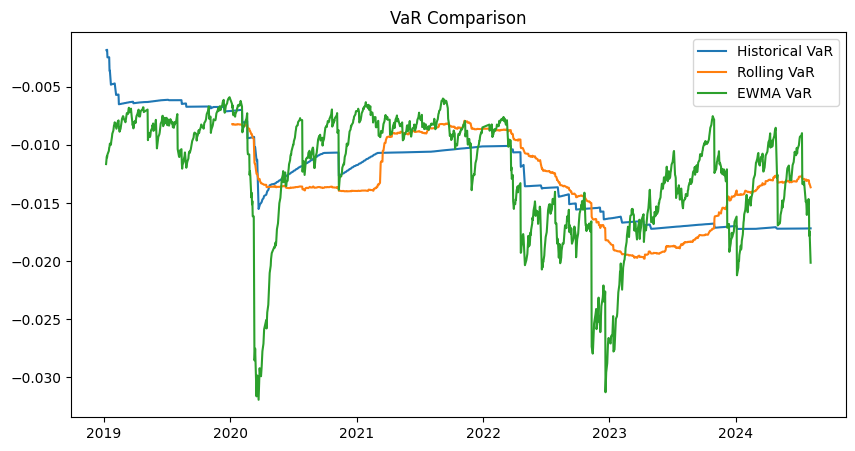

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(var_df.index, var_df['Historical VaR'], label='Historical VaR')
plt.plot(var_df.index, var_df['Rolling VaR'], label='Rolling VaR')
plt.plot(var_df.index, var_df['EWMA VaR'], label='EWMA VaR')

plt.legend()
plt.title('VaR Comparison')
plt.show()

Historical VaR
Pros:
- Simple to implement
- No assumptions about return distribution
- Reflects actual historical events

Cons:
- Past data may not predict future risks
- Requires long data history
- Ignores recent volatility changes

Rolling Volatility VaR
Pros:
- Captures recent market conditions
- More responsive than historical VaR
  
Cons:
- Volatility window size affects results
- May miss long-term trends

EWMA Volatility VaR
Pros:
- Assigns more weight to recent events
- Adapts quickly to changing market conditions

Cons:
- Sensitive to outliers
- Requires careful tuning of decay factor (λ)

### 5.

What statistic do we use to judge the performance of a VaR model?

Estimate and report this statistic across the VaR methods.

Which VaR model do you find is best?

In [ ]:
# We would like to use CVaR to judge the ability of VaR model to capture the risk
from scipy.stats import norm

fx_expanding_cvar = (df_fx.expanding().quantile(0.01).shift(1))
fx_expanding_var.index = df_fx.index

def calculate_cvar(df_fx, var_series):
    # Identify the returns below the VaR threshold
    cvar_returns = df_fx[df_fx <= var_series]
    
    # Calculate the mean of the losses beyond the VaR threshold (ignoring NaNs)
    cvar = cvar_returns.mean()
    
    return cvar

# Calculate CVaR for the last observation
cvar_last = calculate_cvar(df_fx, fx_expanding_var.iloc[-1])

***